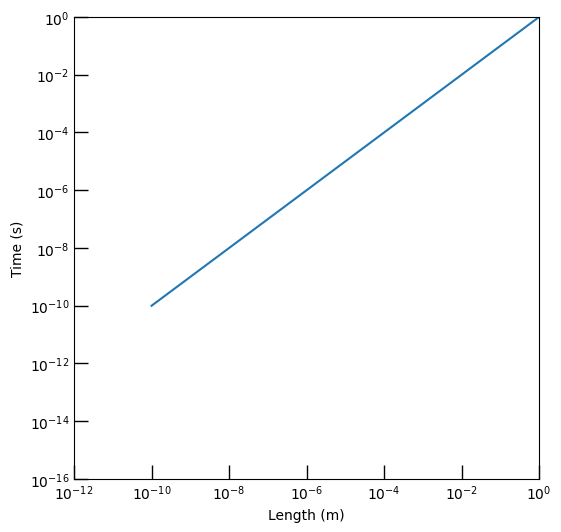

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, AutoMinorLocator
# Create the plot with square aspect ratio
plt.figure(figsize=(6, 6))

# Add labels and title with larger font
plt.xlabel('Length (m)')
plt.ylabel('Time (s)')

# Show ticks on all sides and add minor ticks
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8)
# ax.tick_params(top=True, right=True)

# ax.set_xticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1])
# ax.set_yticks([1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1])

# ax.xaxis.set_minor_locator(LogLocator(subs="auto") )
# ax.xaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_minor_locator(LogLocator(subs="auto") )
# ax.yaxis.set_minor_formatter(NullFormatter())


# Ensure that the tick labels include the value 1
ax.set_xlim(1e-12, 1)
ax.set_ylim(1e-16, 1)
# Use LaTeX-style fonts for better PDF compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Add a sample plot (replace with your actual data)
import numpy as np
x = np.logspace(-10, 2, 100)
y = x
plt.loglog(x, y)

plt.savefig('loglog.pdf')

In [ ]:
from pymatgen.core import Structure

# create a structure with a line of positive and negative charges
structure = Structure(
    lattice=[[10, 0, 0], [0, 10, 0], [0, 0, 10]],
    species=["Li", "Li", "Li", "Li", "Li"],
    coords=[[0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0], [4, 0, 0]],
    site_properties={"charge": [1, 1, 1, 1, 1]}
)
print(structure)

# calculate ewald sum
from pymatgen.analysis.ewald import EwaldSummation
ewald = EwaldSummation(structure)
print(ewald.total_energy)
print(ewald.point_energy)
print(ewald.real_space_energy)

# Define positions and potentials
positions = np.linspace(-5, 5, 100)
total_potential = np.array([ewald.get_site_energy(i) for i, site in enumerate(structure.sites)])
real_potential = np.array([ewald.get_site_energy_real(site) for site in structure.sites])
recip_potential = np.array([ewald.get_site_energy_recip(site) for site in structure.sites])

# Plot total charge distribution as a function of x position
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Total charge distribution
ax1.plot(positions, total_potential, label='Total Potential')
ax1.set_title('Ewald Summation (Total)')
ax1.set_xlabel('Position')
ax1.set_ylabel('Potential')
ax1.legend()

# Real space charge distribution
ax2.plot(positions, real_potential, label='Real Space Potential', color='g')
ax2.set_title('Real Space Sum')
ax2.set_xlabel('Position')
ax2.legend()

# Reciprocal space charge distribution
ax3.plot(positions, recip_potential, label='Reciprocal Space Potential', color='r')
ax3.set_title('Reciprocal Space Sum')
ax3.set_xlabel('Position')
ax3.legend()


plt.tight_layout()
plt.show()

Full Formula (Li5)
Reduced Formula: Li
abc   :  10.000000  10.000000  10.000000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c    charge
---  ----  ---  ---  ---  --------
  0  Li      0    0    0         1
  1  Li      1    0    0         1
  2  Li      2    0    0         1
  3  Li      3    0    0         1
  4  Li      4    0    0         1
-3.7088134333484843
-8.886504638513825
0.21523763729302575


AttributeError: 'EwaldSummation' object has no attribute 'get_site_energy_real'

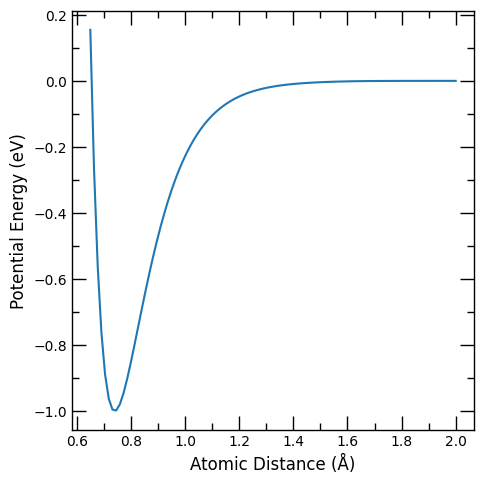

In [11]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, AutoMinorLocator
import matplotlib as mpl

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create a range of distances
distances = np.linspace(0.65, 2, 100)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

fig,ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)


# Plot the results
ax.plot(distances, energies)
ax.set_xlabel('Atomic Distance (Å)')
ax.set_ylabel('Potential Energy (eV)')
fig.tight_layout()
fig.savefig('morse_potential.pdf')

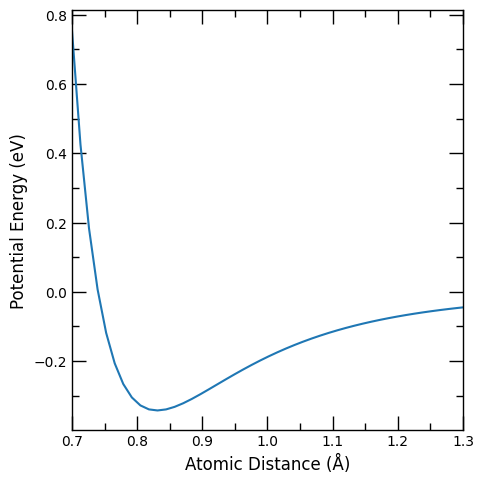

In [17]:
# Define Lennard-Jones potential function
def lennard_jones_potential(r, epsilon=0.3429, sigma=0.74):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Create a range of distances
distances = np.linspace(0.7, 2, 100)

# Calculate Lennard-Jones potential for each distance
lj_energies = lennard_jones_potential(distances)

fig, ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)
ax.set_xlim(0.7,1.3)
# Plot the Lennard-Jones potential
ax.plot(distances, lj_energies)
ax.set_xlabel('Atomic Distance (Å)')
ax.set_ylabel('Potential Energy (eV)')
fig.tight_layout()
fig.savefig('lennard_jones_potential.pdf')
plt.show()
